In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
df_bank = pd.read_csv('bank.csv', delimiter=';')

In [4]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Exploratory and Data Cleaning (EDA)

In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df_bank.shape

(4521, 17)

In [7]:
# Sebelumnya terlihat beberapa kolom yang memilki data type object bukan category seperti deskripsi pada datasetnya.
chnge_dtype = df_bank.columns[df_bank.dtypes == 'object'].to_list()
for col in chnge_dtype:
    df_bank[col] = df_bank[col].astype('category')

In [8]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   category
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   category
dtypes: category(10), int64(7)
memory usage: 293.4 KB


In [9]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
# Terlihat tidak ada missing value pada dataset tersebut, selanjutnya lihat ringkasan singkat pada setiap kolom dengan describe()
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [11]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Visualization and Analysis Data

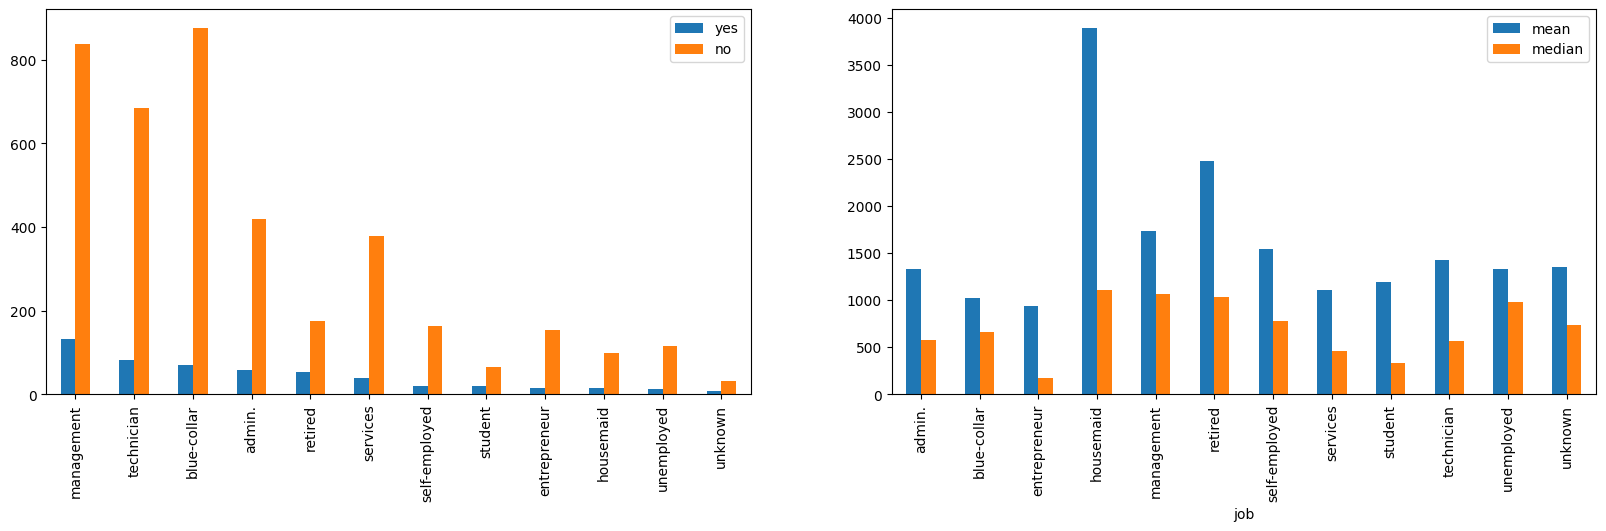

In [13]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

job = pd.DataFrame()
job['yes'] = df_bank[df_bank['y'] == 'yes']['job'].value_counts()
job['no'] = df_bank[df_bank['y'] == 'no']['job'].value_counts()
job.plot(kind='bar', ax=ax0)

job_balance = df_bank[df_bank['y'] == 'yes']
job_balance = job_balance.pivot_table(
    index='job',
    values='balance',
    aggfunc=[np.mean, np.median]
)
job_balance.plot(kind='bar', ax=ax1, figsize=(20, 5))
plt.legend(['mean', 'median'])

Text(0.5, 1.0, 'Marital Percentage')

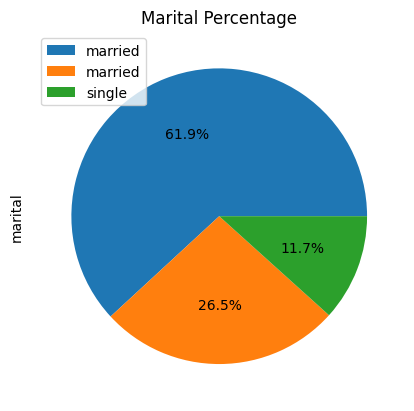

In [14]:
df_bank['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.legend(labels=df_bank['marital'], loc='upper left')
plt.title('Marital Percentage')

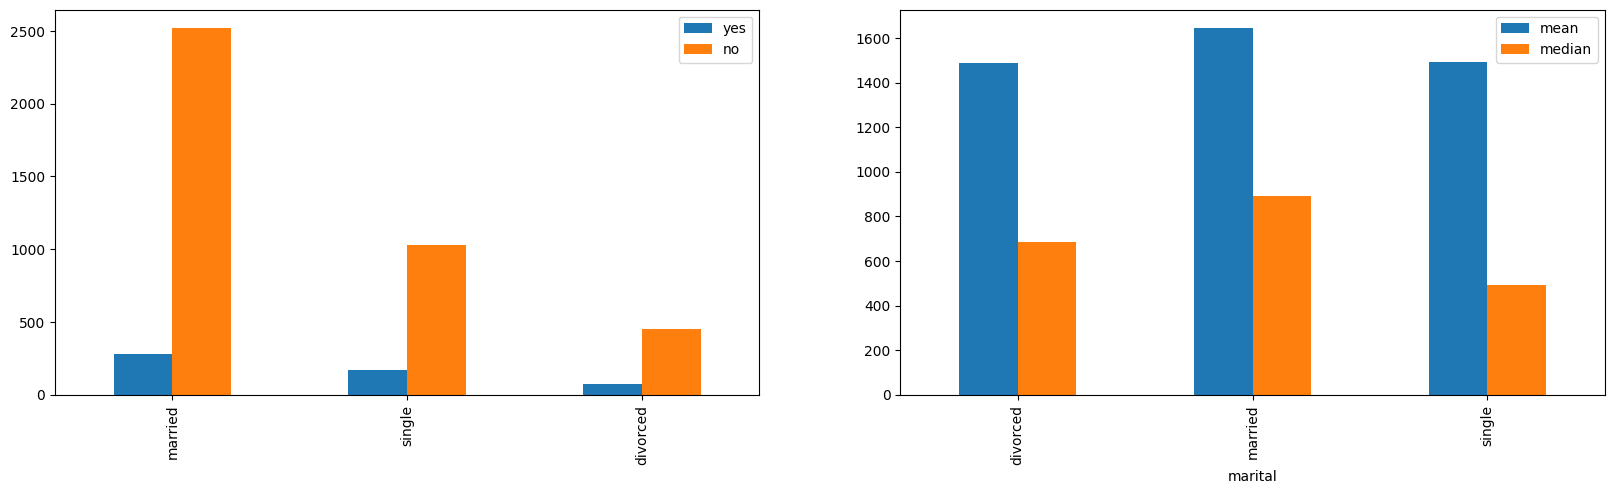

In [15]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

marital_yn = pd.DataFrame()
marital_yn['yes'] = df_bank[df_bank['y'] == 'yes']['marital'].value_counts()
marital_yn['no'] = df_bank[df_bank['y'] == 'no']['marital'].value_counts()
marital_yn.plot(kind='bar', ax=ax0)

marital_balance = df_bank[df_bank['y'] == 'yes']
marital_balance = marital_balance.pivot_table(
    index='marital',
    values='balance',
    aggfunc=[np.mean, np.median]
)
marital_balance.plot(kind='bar', ax=ax1, figsize=(20, 5))
plt.legend(['mean', 'median'])

<AxesSubplot: >

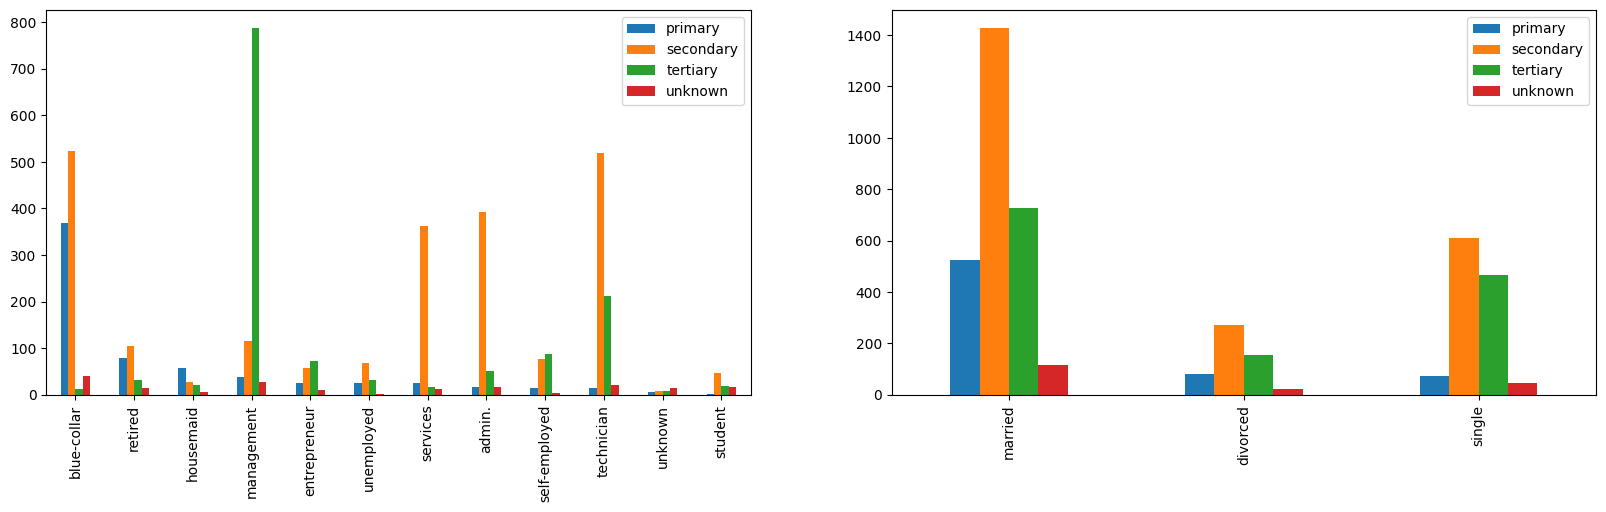

In [17]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)


edu_list = list(df_bank['education'].unique())

edu_job = pd.DataFrame()
for edu in edu_list:
    edu_job[edu] = df_bank[df_bank['education'] == edu]['job'].value_counts()
edu_job.plot(kind='bar', ax=ax0)

edu_marital = pd.DataFrame()
for edu in edu_list:
    edu_marital[edu] = df_bank[df_bank['education'] == edu]['marital'].value_counts()
edu_marital.plot(kind='bar', ax=ax1, figsize=(20, 5))

# Correlation

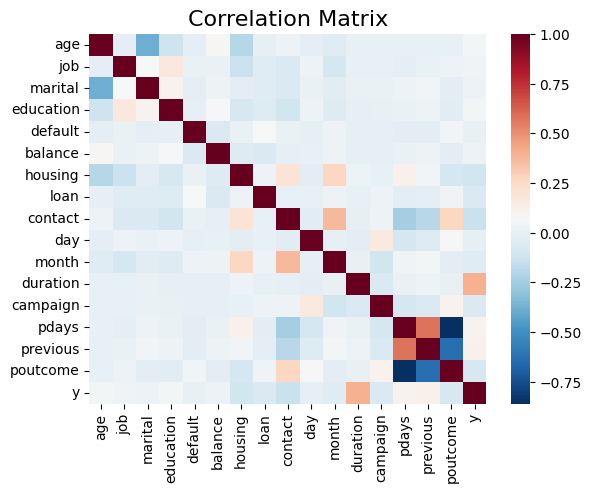

<Figure size 2000x2000 with 0 Axes>

In [18]:
cat_col_list = df_bank.columns[df_bank.dtypes == 'category'].to_list()
for col in cat_col_list:
    df_bank[col] = preprocessing.LabelEncoder().fit_transform(df_bank[col])

x = df_bank.iloc[:, 0:16]
y = df_bank.iloc[:, -1]

corrmat = df_bank.corr()
sns.heatmap(df_bank[corrmat.index].corr(),cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.figure(figsize=(20, 20))
plt.show()

# Features Importance

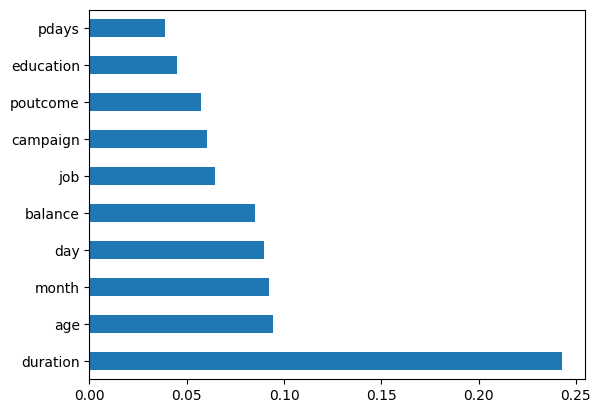

In [19]:
model = ExtraTreesClassifier()
model.fit(x, y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Classification Models

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Logistic Regression

In [21]:
# Model
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [22]:
# Result
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8887251289609432 

Confusion Matrix :
 [[1176   29]
 [ 122   30]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.51      0.20      0.28       152

    accuracy                           0.89      1357
   macro avg       0.71      0.59      0.61      1357
weighted avg       0.86      0.89      0.87      1357



# K-Nearest Neighbors

In [23]:
# Model
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [24]:
# Result
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8754605747973471 

Confusion Matrix :
 [[1154   51]
 [ 118   34]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1205
           1       0.40      0.22      0.29       152

    accuracy                           0.88      1357
   macro avg       0.65      0.59      0.61      1357
weighted avg       0.85      0.88      0.86      1357



# SVM

In [25]:
# Model
model = svm.SVC()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [26]:
# Result
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8872512896094326 

Confusion Matrix :
 [[1204    1]
 [ 152    0]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1205
           1       0.00      0.00      0.00       152

    accuracy                           0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.79      0.89      0.83      1357



# Decision Tree

In [27]:
# Model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [28]:
# Result
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8577745025792188 

Confusion Matrix :
 [[1107   98]
 [  95   57]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.37      0.38      0.37       152

    accuracy                           0.86      1357
   macro avg       0.64      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357



# Random Forest

In [29]:
# Model
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [30]:
# Result
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.9027266028002948 

Confusion Matrix :
 [[1178   27]
 [ 105   47]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1205
           1       0.64      0.31      0.42       152

    accuracy                           0.90      1357
   macro avg       0.78      0.64      0.68      1357
weighted avg       0.89      0.90      0.89      1357



# Naive Bayes

In [31]:
# Model
model = GaussianNB()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

In [32]:
# Result
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8253500368459837 

Confusion Matrix :
 [[1049  156]
 [  81   71]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      1205
           1       0.31      0.47      0.37       152

    accuracy                           0.83      1357
   macro avg       0.62      0.67      0.64      1357
weighted avg       0.86      0.83      0.84      1357

